# **INTRODUCTION**


In this notebook, I will analyze and build models to detect fraudulent transactions in a credit card dataset.

We'll explore the data, preprocess it, and apply several machine learning models to predict fraud, including Logistic Regression, Isolation Forest, and Local Outlier Factor.

The performance of these models will be evaluated using common classification metrics.

# Step 1: Importing Libraries

We begin by importing the necessary libraries for data analysis, visualization, and model building:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Step 2: Loading and Exploring the Dataset

Next, we'll load the dataset and conduct some initial exploration:

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()  # Checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Step 3: Class Distribution

We visualize the class distribution to understand the balance between fraud and non-fraud transactions:

Class
0    284315
1       492
Name: count, dtype: int64


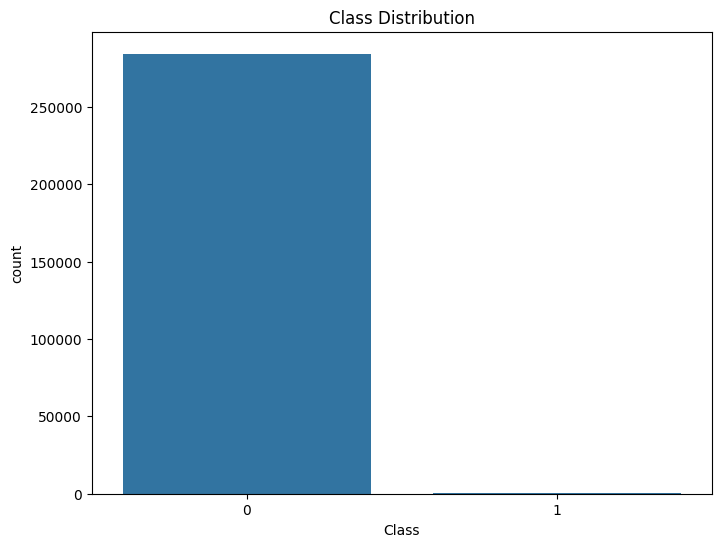

In [3]:
# Class distribution
class_counts = df['Class'].value_counts()
print(class_counts)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


# Step 4: Feature-Target Separation and Data Splitting

We separate the features (X) from the target (y) and split the data into training and testing sets:

In [4]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 5: Scaling the Features

To improve model performance, we scale the features using StandardScaler:

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 6: Training a Logistic Regression Model

We build and train a Logistic Regression model:

In [6]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))


[[56854    10]
 [   43    55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9990695551420246
Precision: 0.8461538461538461
Recall: 0.5612244897959183
F1-Score: 0.6748466257668712


# Step 7: Outlier Detection with Isolation Forest and Local Outlier Factor

We implement two unsupervised anomaly detection algorithms—Isolation Forest and Local Outlier Factor (LOF)—to detect fraud:

In [ ]:
# Isolation Forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
y_pred_if = isolation_forest.fit_predict(X)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_lof = lof.fit_predict(X)

# Convert -1 to 1 (fraud) and 1 to 0 (normal)
y_pred_if = np.where(y_pred_if == -1, 1, 0)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

# Evaluate both models
print("Isolation Forest:")
print(confusion_matrix(y, y_pred_if))
print(classification_report(y, y_pred_if))

print("\nLocal Outlier Factor:")
print(confusion_matrix(y, y_pred_lof))
print(classification_report(y, y_pred_lof))


# Step 8: Correlation Analysis

We'll calculate the correlation between features and visualize it using a heatmap:

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Step 9: Visualizing Feature Distributions by Class

We visualize the distribution of the first five features (V1 to V5) for both classes (fraud and non-fraud):

In [ ]:
features = ['V1', 'V2', 'V3', 'V4', 'V5']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()


# Step 10: Separate and Describe Fraudulent and Non-Fraudulent Transactions

We separate the fraud and non-fraud transactions and display descriptive statistics for both:

In [ ]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

print("Fraud Transactions:")
print(fraud.describe())

print("\nNon-Fraud Transactions:")
print(non_fraud.describe())


# Step 11: Comparing Model Performance

Finally, we compare the performance of all models in terms of accuracy, precision, recall, and F1-score:

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Isolation Forest', 'Local Outlier Factor'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y, y_pred_if), accuracy_score(y, y_pred_lof)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y, y_pred_if), precision_score(y, y_pred_lof)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y, y_pred_if), recall_score(y, y_pred_lof)],
    'F1-Score': [f1_score(y_test, y_pred_lr), f1_score(y, y_pred_if), f1_score(y, y_pred_lof)]
})

print(results)


# Step 12: Visualizing Amount Distribution by Class
We visualize the distribution of the transaction amounts for both classes:

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=50, kde=True)
plt.title('Amount Distribution by Class')
plt.xlim(0, 2000)
plt.show()


# Conclusion
In this notebook, we aimed to detect credit card fraud using various machine learning techniques, including Logistic Regression, Isolation Forest, and Local Outlier Factor (LOF). The dataset we used consisted of 284,807 transactions, out of which only 492 were fraudulent, making this a highly imbalanced classification problem.

Our first model was Logistic Regression, which performed well in terms of accuracy (99.9%) but struggled with fraud detection, achieving a recall of 56%. While precision was relatively high at 84%, the model missed a significant number of fraud cases, highlighting the challenge of dealing with imbalanced datasets.

Next, we applied two unsupervised anomaly detection algorithms: Isolation Forest and Local Outlier Factor. Isolation Forest performed better, identifying fraud cases with a recall of 59%, but still had limitations in terms of precision. LOF, on the other hand, had a much lower recall of 15%, making it less effective for this problem.

One of the key insights from this project is that while traditional models like Logistic Regression can achieve high accuracy overall, they may not be the best choice for highly imbalanced datasets where detecting rare cases (such as fraud) is the priority. Anomaly detection methods, while useful, also require fine-tuning and may not provide sufficient precision for practical use without further optimization.

Overall, this project highlights the complexities of fraud detection and the need for more advanced techniques, such as ensemble methods or cost-sensitive learning, to improve recall and precision in identifying fraudulent transactions.